#### Libraries import

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

import seaborn as sns
sns.set;

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.decomposition import PCA
RS = 123 # For T-SNE to work
from sklearn.manifold import isomap

import time

import scipy.spatial


### DATA READING AND LOADING

In [2]:
jaam_songs = pd.read_csv('jaam_features')#.drop(['loudness', 'mode'], axis=1)
print(jaam_songs.shape)
jaam_songs.head()

(200, 12)


acousticness  danceability  energy                      id  \
0      0.000973         0.653   0.934  0sSlquw5Lx9eXqlSlTrOiW   
1      0.010700         0.764   0.620  36482hNESSwELpr9sS3NbE   
2      0.039700         0.494   0.698  4aVuWgvD0X63hcOCnZtNFA   
3      0.166000         0.229   0.500  3gkijt6bxk8ts6S2RCEu4n   
4      0.102000         0.547   0.836  3DkpUR4TEV2XCxFsSL9m0r   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.000512    7    0.1440    -2.878     1       0.2950  127.029   
1          0.000005    5    0.0968    -5.757     0       0.1840  129.989   
2          0.006340    6    0.1520   -12.049     0       0.0553   95.842   
3          0.000248    4    0.4540    -6.769     1       0.0312   96.022   
4          0.000000    6    0.1830    -5.361     0       0.1880  104.985   

   valence  
0    0.561  
1    0.526  
2    0.778  
3    0.185  
4    0.649

This last dataset is the one we are going to use to evaluate all the clustering methods to ultimately define which one fits best with our type of data

# Clustering

K-Means approach seems best to perform the clustering of our data


### Standardization 

* to ensure all variables are considered equally and to improve K-means performance

In [3]:
X_user = jaam_songs.drop('id', axis=1)

In [4]:
scaler = StandardScaler()
X_user = scaler.fit_transform(X_user)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 4. K-Means

The Silhouette Index measure the distance between each data point, the centroid of the cluster it was assigned to and the closest centroid belonging to another cluster. 

For n_clusters = 4 The average silhouette_score is : 0.16264845259966554
For n_clusters = 5 The average silhouette_score is : 0.1565078168617289
For n_clusters = 6 The average silhouette_score is : 0.18180615678121492
For n_clusters = 7 The average silhouette_score is : 0.17205858904566493
For n_clusters = 8 The average silhouette_score is : 0.1758502849044058
For n_clusters = 9 The average silhouette_score is : 0.16904493086218594


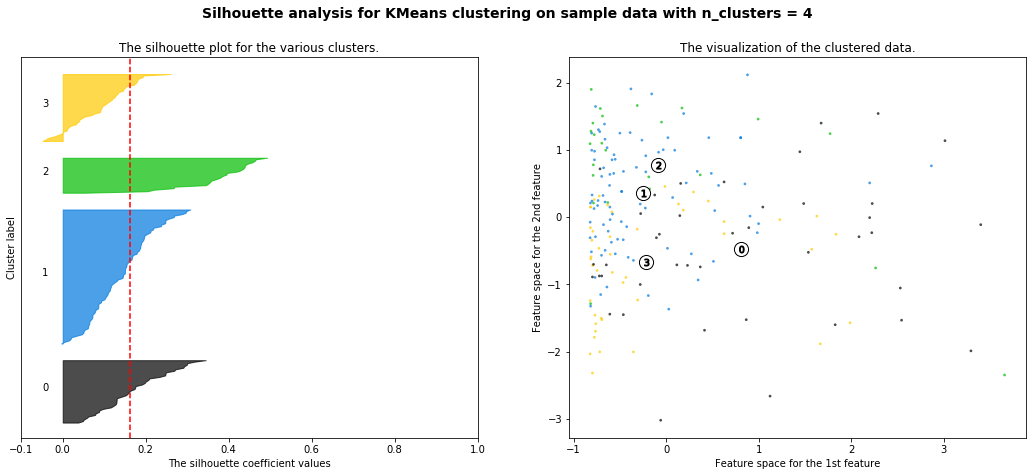

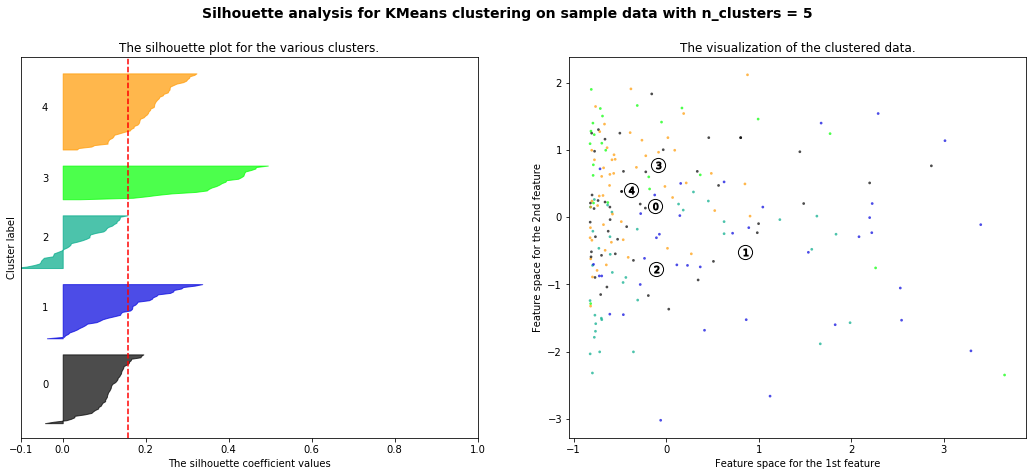

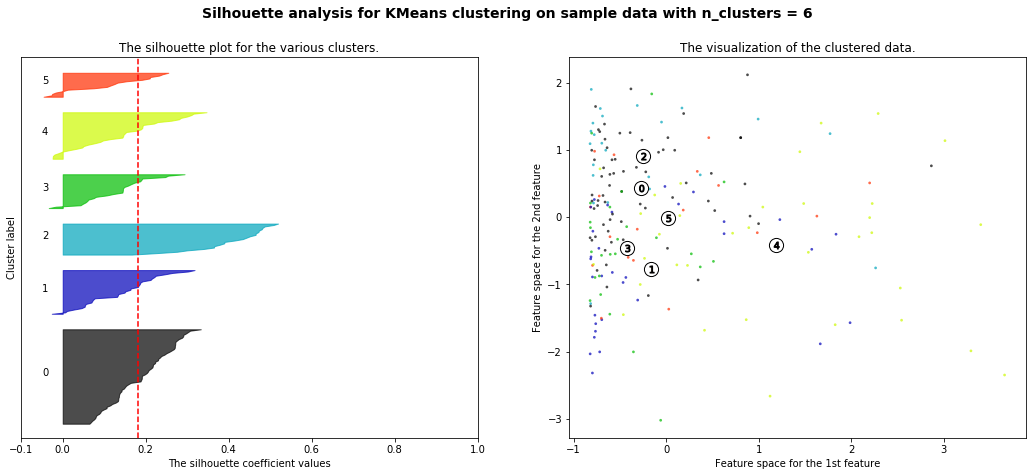

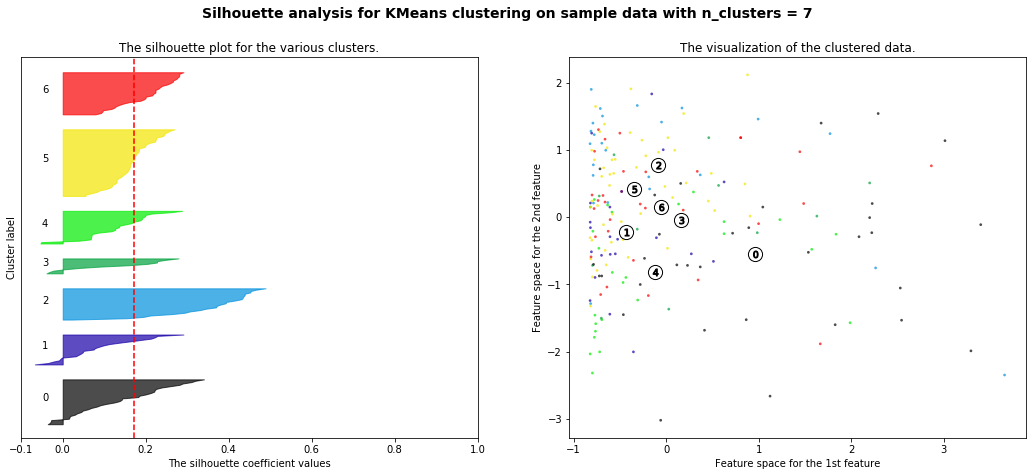

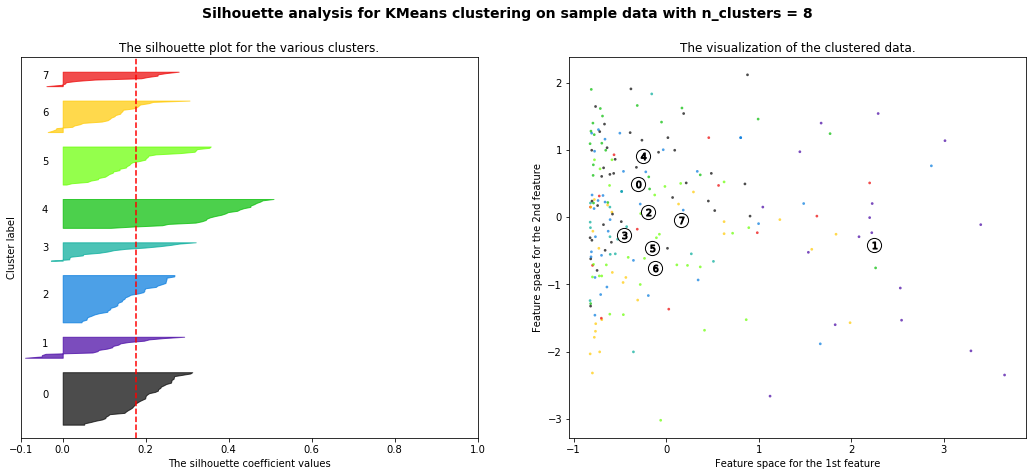

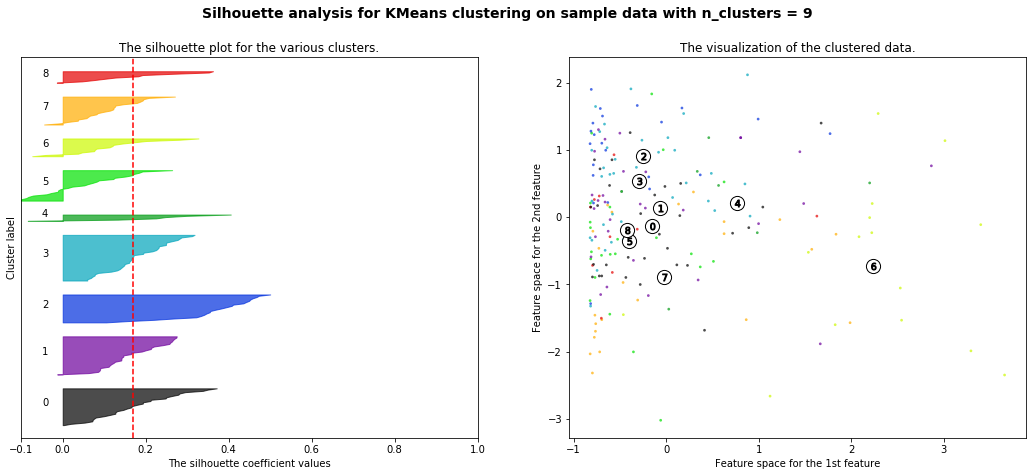

In [5]:
from __future__ import print_function

range_n_clusters = range(4,10)

silhouette_list = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_user) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_user)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_user, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_user, cluster_labels)
    
    # Update our silhouette dataframe with the silhouette score per n_clusters
    silhouette_list.append([n_clusters, silhouette_avg])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_user[:, 0], X_user[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [6]:
silhouette_df = pd.DataFrame(data = silhouette_list, columns=['n_clusters', 'silhouette_score'])
silhouette_df

n_clusters  silhouette_score
0           4          0.162648
1           5          0.156508
2           6          0.181806
3           7          0.172059
4           8          0.175850
5           9          0.169045

In [7]:
final_n = (silhouette_df.loc[silhouette_df['silhouette_score'].idxmax()]['n_clusters']).astype(int)
final_n

6

We take k=6, where the silhouette score is the highest

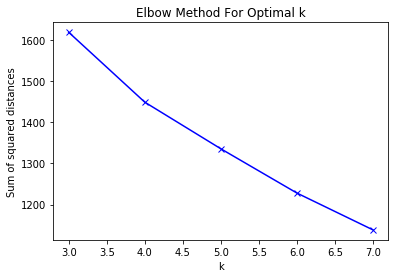

In [8]:
ss_dist = []
K = range(3, 8)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state=123)
    km = km.fit(X_user)
    ss_dist.append(km.inertia_)
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow method, despite being way less accurate, also reinforces our decision of considering 6 clusters

In [9]:
kmeans = KMeans(n_clusters=final_n, random_state=0).fit(X_user)
y_kmeans = kmeans.predict(X_user)
cluster_column = pd.DataFrame(y_kmeans, columns=['cluster'])
print(cluster_column.shape)

(200, 1)


#### Cluster counts

In [10]:
y_counts = np.bincount(y_kmeans)
print(y_counts)

[26 70 24 34 27 19]


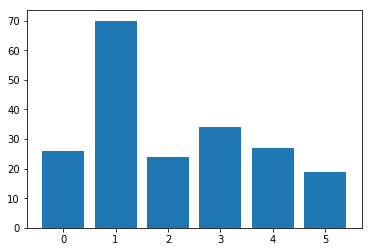

In [11]:
plt.bar(np.arange(len(y_counts)),y_counts);  

In [12]:
X_feat_clusters = pd.concat([cluster_column, jaam_songs], axis=1)
print(X_feat_clusters['cluster'].nunique())
X_feat_clusters.head()

6


cluster  acousticness  danceability  energy                      id  \
0        5      0.000973         0.653   0.934  0sSlquw5Lx9eXqlSlTrOiW   
1        5      0.010700         0.764   0.620  36482hNESSwELpr9sS3NbE   
2        1      0.039700         0.494   0.698  4aVuWgvD0X63hcOCnZtNFA   
3        0      0.166000         0.229   0.500  3gkijt6bxk8ts6S2RCEu4n   
4        5      0.102000         0.547   0.836  3DkpUR4TEV2XCxFsSL9m0r   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.000512    7    0.1440    -2.878     1       0.2950  127.029   
1          0.000005    5    0.0968    -5.757     0       0.1840  129.989   
2          0.006340    6    0.1520   -12.049     0       0.0553   95.842   
3          0.000248    4    0.4540    -6.769     1       0.0312   96.022   
4          0.000000    6    0.1830    -5.361     0       0.1880  104.985   

   valence  
0    0.561  
1    0.526  
2    0.778  
3    0.185  
4    0.649

In [13]:
X_feat_clusters.to_csv("jaam_clusters", sep=',', index=False) 

# Visualization

* We will try different methods and see which is able to separate better our 6 clusters.

In [14]:
def fashion_scatter(x, colors):

    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes)) 

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []

    for i in range(num_classes):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

### 1. PCA

In [15]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_user)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.004669904708862305 seconds


In [16]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.259149   0.11705079 0.11557544 0.10318671]


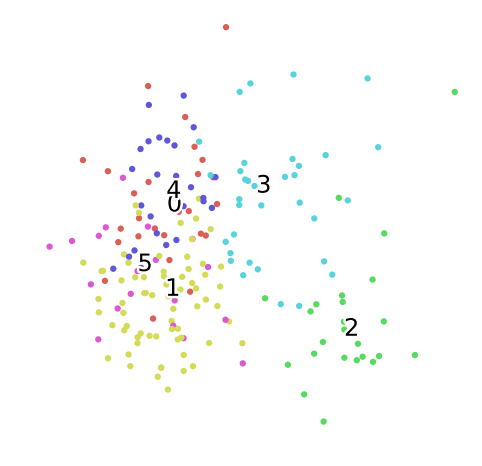

In [17]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_kmeans); # Visualizing the PCA output

### 2. T-SNE

In [18]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

tsne = TSNE(random_state=RS).fit_transform(X_user)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 0.7739748954772949 seconds


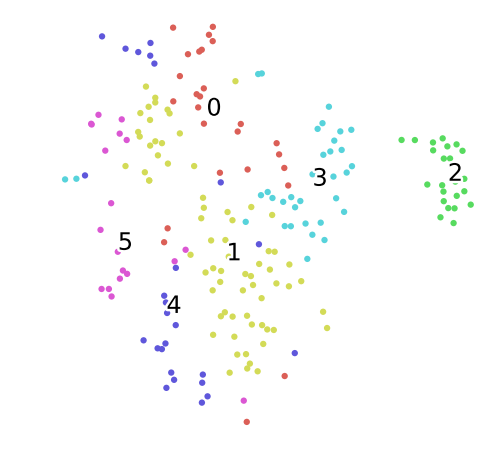

In [19]:
fashion_scatter(tsne, y_kmeans);

### 3. ISOMAP

In [20]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
isomap = embedding.fit_transform(X_user)
isomap.shape

(200, 2)

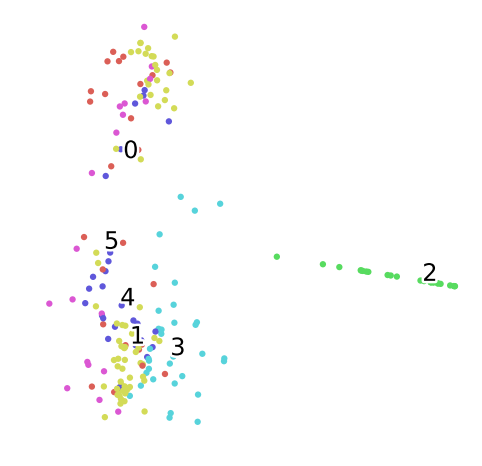

In [21]:
fashion_scatter(isomap, y_kmeans);

### CONCLUSION

* T-SNE technique separates clusters better than other methods when visualizing in 2 dimensions